#Exercise




Estimate the location from WIFI Signal Strength




The dataset has 2,000 rows and 8 columns. The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.




You can use ANN analysis for this exerise to improve the ANN performance.

In [5]:
#Mouting Google Drive into Google Colab
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [23]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense #Linear Equation

In [10]:
#Importing the dataset
path = '/content/drive/MyDrive/Colab Notebooks/wifi.csv'
df = pd.read_csv(path)
df

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [11]:
#Explore the 'n' rows of dataset in horizontal header format
df.head().T

,0,1,2,3,4
Wifi 1,-64,-68,-63,-61,-63
Wifi 2,-56,-57,-60,-60,-65
Wifi 3,-61,-61,-60,-68,-60
Wifi 4,-66,-65,-67,-62,-63
Wifi 5,-71,-71,-76,-77,-77
Wifi 6,-82,-85,-85,-90,-81
Wifi 7,-81,-85,-84,-80,-87
Room,1,1,1,1,1


In [53]:
room_dummies = pd.get_dummies(df['Room'])
pd.concat([df['Room'], room_dummies], axis = 1)

,Room,1,2,3,4
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0
...,...,...,...,...,...
1995,4,0,0,0,1
1996,4,0,0,0,1
1997,4,0,0,0,1
1998,4,0,0,0,1


In [54]:
x = df.drop("Room", axis = 1) #drop "Room" column; "axis = 1" means column
y = room_dummies #select "Room" column

In [55]:
#Explore the values in "y"
y.value_counts()

1  2  3  4
0  0  0  1    500
      1  0    500
   1  0  0    500
1  0  0  0    500
dtype: int64

In [67]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (1600, 7)
y_train shape (1600, 4)
x_test shape (400, 7)
y_test shape (400, 4)


In [68]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [69]:
#Building the sequential model
#**Neuron
L1 = 100
L2 = 100

model = Sequential()
model.add(Dense(L1, input_dim=7, activation = "relu"))
model.add(Dense(L2,activation="relu"))

#output layer
model.add(Dense(4, activation="softmax"))

#Compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = "adam")

# training the model for 10 epochs
history = model.fit(x_train, y_train, epochs=10, batch_size=100, 
                    validation_data=(x_test, y_test))

Epoch 1/10
16/16 [==============================] - 1s 26ms/step - loss: 1.1361 - accuracy: 0.5606 - val_loss: 0.8248 - val_accuracy: 0.7425
Epoch 2/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6420 - accuracy: 0.8150 - val_loss: 0.4791 - val_accuracy: 0.8600
Epoch 3/10
16/16 [==============================] - 0s 10ms/step - loss: 0.3770 - accuracy: 0.9200 - val_loss: 0.2869 - val_accuracy: 0.9475
Epoch 4/10
16/16 [==============================] - 0s 12ms/step - loss: 0.2342 - accuracy: 0.9581 - val_loss: 0.1851 - val_accuracy: 0.9550
Epoch 5/10
16/16 [==============================] - 0s 13ms/step - loss: 0.1579 - accuracy: 0.9650 - val_loss: 0.1360 - val_accuracy: 0.9625
Epoch 6/10
16/16 [==============================] - 0s 12ms/step - loss: 0.1210 - accuracy: 0.9700 - val_loss: 0.1116 - val_accuracy: 0.9625
Epoch 7/10
16/16 [==============================] - 0s 11ms/step - loss: 0.1010 - accuracy: 0.9719 - val_loss: 0.0981 - val_accuracy: 0.9650
Epoch 8/10
16

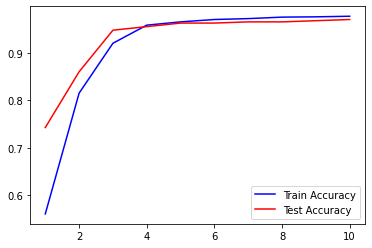

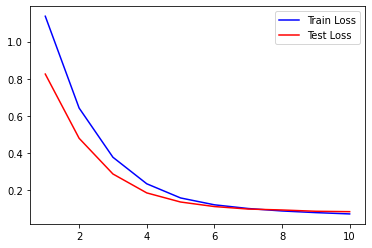

In [70]:
#Turn result into "visualization"
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
pt.plot(epochs, acc, 'b', label="Train Accuracy")
pt.plot(epochs, val_acc, 'r', label="Test Accuracy")
pt.legend()
pt.figure()

pt.plot(epochs, loss, 'b', label="Train Loss")
pt.plot(epochs, val_loss, 'r', label="Test Loss")
pt.legend()
pt.show()

#Model with initializer and regularizer

In [61]:
#Import initializers and regularizers
from keras import initializers
from keras import regularizers

In [73]:
#Building the sequential model
#**Neuron
L1 = 100
L2 = 100

model = Sequential()
model.add(Dense(L1, input_dim=7, activation = "relu",
          kernel_initializer='he_normal',
          kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2,activation="relu"))

#output layer
model.add(Dense(4, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = "adam")

history2 = model.fit(x_train, y_train, epochs=10, batch_size=100, 
                    validation_data=(x_test, y_test))

Epoch 1/10
16/16 [==============================] - 2s 23ms/step - loss: 2.7274 - accuracy: 0.7312 - val_loss: 2.2909 - val_accuracy: 0.9200
Epoch 2/10
16/16 [==============================] - 0s 7ms/step - loss: 2.1496 - accuracy: 0.9463 - val_loss: 2.0440 - val_accuracy: 0.9575
Epoch 3/10
16/16 [==============================] - 0s 7ms/step - loss: 1.9773 - accuracy: 0.9613 - val_loss: 1.9144 - val_accuracy: 0.9575
Epoch 4/10
16/16 [==============================] - 0s 10ms/step - loss: 1.8663 - accuracy: 0.9663 - val_loss: 1.8140 - val_accuracy: 0.9625
Epoch 5/10
16/16 [==============================] - 0s 7ms/step - loss: 1.7722 - accuracy: 0.9681 - val_loss: 1.7284 - val_accuracy: 0.9650
Epoch 6/10
16/16 [==============================] - 0s 8ms/step - loss: 1.6853 - accuracy: 0.9719 - val_loss: 1.6453 - val_accuracy: 0.9625
Epoch 7/10
16/16 [==============================] - 0s 9ms/step - loss: 1.6036 - accuracy: 0.9725 - val_loss: 1.5716 - val_accuracy: 0.9700
Epoch 8/10
16/16 [

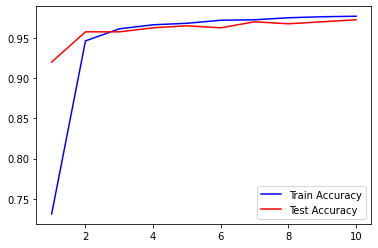

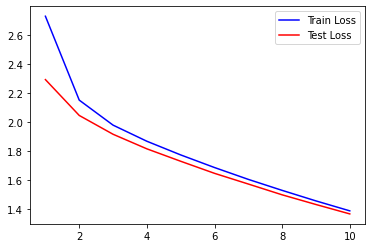

In [74]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc2)+1)
pt.plot(epochs, acc2, 'b', label="Train Accuracy")
pt.plot(epochs, val_acc2, 'r', label="Test Accuracy")
pt.legend()
pt.figure()

pt.plot(epochs, loss2, 'b', label="Train Loss")
pt.plot(epochs, val_loss2, 'r', label="Test Loss")
pt.legend()
pt.show()